In [2]:
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

np.random.seed(9876789)



import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as P


In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
import os
os.getcwd()

'/Users/MichaelMiao/Documents/GitHub/2019-fa-stats131-group-2'

In [5]:
sleep=pd.read_excel("sleep.xlsx")

In [4]:
sleep.head(3)
for col in sleep.columns: 
    print(col) 

,CaseID,weight,tm_start,tm_finish,duration,QFLAG,XSPANISH,XPRIMELAN,DeviceType,DeviceType2,...,PPSTATEN,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PPCHILDHH,PPWORK,PPWORK2,PPNET
0,1,2.7211,2014-12-05 17:30:31,2014-12-05 17:41:55,11,1,2,2,9,9,...,93,0,0,1,0,4,1,4,2,1
1,2,1.2304,2014-12-05 17:30:46,2014-12-05 17:43:39,12,1,1,5,9,9,...,59,0,0,0,0,3,0,5,2,0
2,3,0.9174,2014-12-05 17:31:16,2014-12-05 17:46:37,15,1,1,5,9,9,...,57,0,0,0,1,2,1,1,1,1


CaseID
weight
tm_start
tm_finish
duration
QFLAG
XSPANISH
XPRIMELAN
DeviceType
DeviceType2
Q1ABorder
Q1_A
Q1_A_3
Q1_B
Q1_B_3
Q1_C
Q1_C_3
Q1_D
Q1_D_3
Q2_HoursA
Q2_MinutesA
Q2_ampmA
Q2_HoursB
Q2_MinutesB
Q2_ampmB
DOV_WEEKTIME
Q2_TOTAL
Q3_HoursA
Q3_MinutesA
Q3_ampmA
Q3_HoursB
Q3_MinutesB
Q3_ampmB
DOV_WEEKEND
Q3_TOTAL
Q6_HoursA
Q6_MinutesA
Q6_HoursB
Q6_MinutesB
DOV_TOTALWEEK
DOV_TOTALWEEKEND
Q6_WEEKDAYS
Q6_WEEKENDS
Q7_Hours
Q7_Minutes
DOV_TOTALSLEEP
Q7_TOTAL
Q8_a
Q8_a_3
Q8_b
Q8_b_3
Q8_c
Q8_c_3
Q8_d
Q8_d_3
Q9_a
Q9_a_3
Q9_b
Q9_b_3
Q9_c
Q9_c_3
Q10_a
Q10_a_3
Q11
Q11_3
Q11A_a
Q11a_a_3
Q11A_b
Q11a_b_3
Q11A_c
Q11a_c_3
Q11A_d
Q11a_d_3
Q11A_e
Q11a_e_3
Q12_a
Q12_b
Q13_a
Q13_a_3
Q13_b
Q13_b_3
Q14order
Q14_a
Q14_a_3
Q14_b
Q14_b_3
Q14_c
Q14_c_3
Q14_d
Q14_d_3
Q14_e
Q14_e_3
Q14a
Q14_A2_3
Q15_a
Q15_a_3
Q15_b
Q15_b_3
Q15_c
Q15_c_3
Q15_d
Q15_d_3
Q15_e
Q15_e_3
Q16
Q16_3
Q17
Q17_3
Q18
Q18_3
Q19
Q19_3
Q20
Q21
Q22
Q23_a
Q23_b
Q23_c
Q24_a
Q24_a_2
Q24_b
Q24_b_2
Q24_c
Q24_c_2
Q24_d
Q24_d_2
Q24_e
Q24_e_2
Q24_f
Q24_f

In [5]:
(sleep[["Q10_a"]])
#sleep["Q10_a"].raranke()

,Q10_a
0,4
1,4
2,4
3,2
4,4
...,...
1024,4
1025,4
1026,4
1027,3


In [6]:
import os 

In [7]:
os.getcwd()

'/Users/MichaelMiao/Documents/career/Jupyter_files/Python'

In [8]:
# in bed 7.9 
# sleep 6.9

In [9]:
def minmax(val_list):
    min_val = min(val_list)
    max_val = max(val_list)

    return (min_val, max_val)

In [10]:
minmax(list(sleep['Q10_a']))

(1, 5)

In [1]:
plt.hist(list(sleep['Q10_a']), bins=10)

plt.ylabel('No of times')
plt.xlim(0,5)
plt.show()

NameError: name 'plt' is not defined

In [12]:
import math
 
val = math.floor(12.95)
print(val)

12


In [13]:
sleep['Q3_HoursA'].value_counts()

#minmax(sleep['Q3_HoursA'])

#sleep['Q3_HoursB']

 11    327
 10    255
 12    151
 1      88
 9      77
 2      50
 3      27
 8      19
 4      13
 6       7
 5       7
 7       4
-1       4
Name: Q3_HoursA, dtype: int64

In [14]:
sleep['Q6_HoursA'].value_counts()

 7     338
 6     260
 8     195
 5     111
 4      39
 9      32
 10     27
 3      10
-1       6
 11      4
 12      3
 2       3
 1       1
Name: Q6_HoursA, dtype: int64

In [15]:
sleep.sleeptime_cat=sleep.Q6_HoursA.astype('category')

/Users/MichaelMiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [16]:
import math
math.floor(13)

13

In [17]:
sleep['qua'] = [math.floor(x) for x in sleep.Q10_a]

In [18]:
sleep.qua

0       4
1       4
2       4
3       2
4       4
       ..
1024    4
1025    4
1026    4
1027    3
1028    3
Name: qua, Length: 1029, dtype: int64

In [19]:
k=range(sleep.shape[0])
for qua in range(sleep.shape[0]):
    sleep['qua'] = math.floor(sleep.Q10_a[qua])

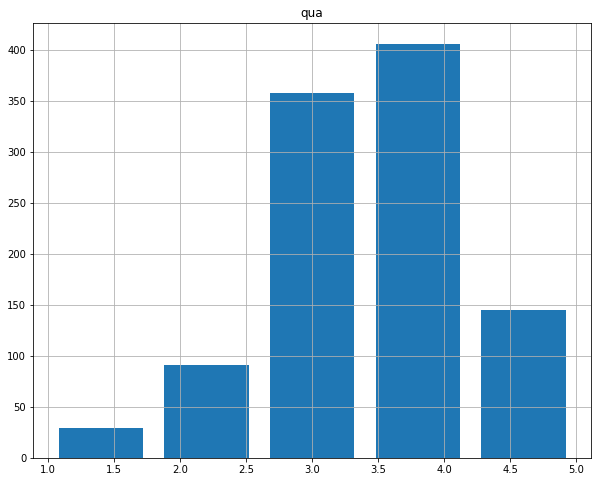

In [20]:
sleep['qua'] = [math.floor(x) for x in sleep.Q10_a]
a=sleep.hist(column='qua',bins=5,rwidth=0.8,figsize=(10,8))

(1029, 192)

(1023, 2)

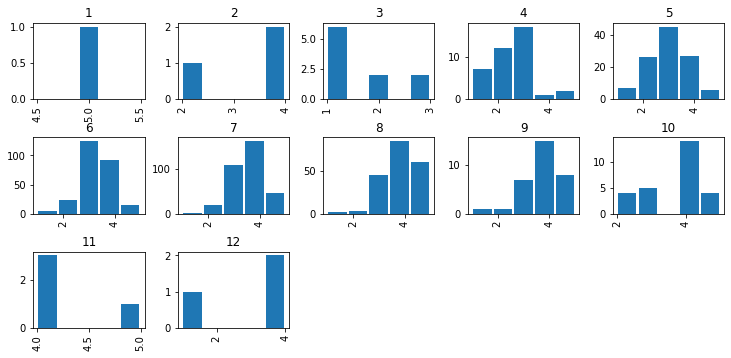

In [21]:
sleep['qua'] = [math.floor(x) for x in sleep.Q10_a]
sleep.shape
new_sleep = sleep.loc[sleep.Q6_HoursA>0,['qua','Q6_HoursA']]
new_sleep.shape
b=new_sleep.hist(column='qua',bins=5,rwidth=0.9,figsize=(12,12),layout=(6,5),by=new_sleep.Q6_HoursA,)



(1029, 192)

(1022, 2)

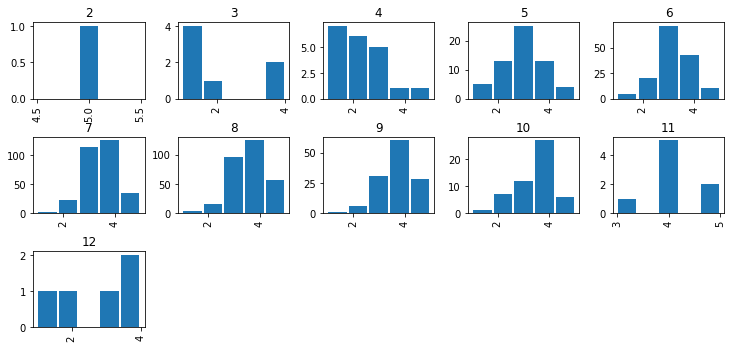

In [22]:
sleep['qua'] = [math.floor(x) for x in sleep.Q10_a]
sleep.shape
new_sleep = sleep.loc[sleep.Q6_HoursB>=0,['qua','Q6_HoursB']]
new_sleep.shape
b=new_sleep.hist(column='qua',bins=5,rwidth=0.9,figsize=(12,12),layout=(6,5),by=new_sleep.Q6_HoursB,)




(1029, 192)

(1017, 3)

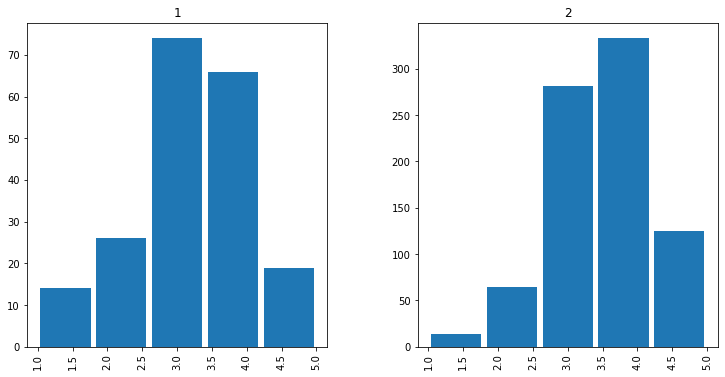

In [23]:
sleep['qua'] = [math.floor(x) for x in sleep.Q10_a]
sleep.shape
new_sleep = sleep.loc[sleep.Q2_HoursA>0,['qua','Q2_HoursA','Q2_ampmA']]
new_sleep=new_sleep.loc[new_sleep.Q2_ampmA>0]
new_sleep.shape



b=new_sleep['qua'].hist(bins=5,rwidth=0.9,figsize=(12,6),by=new_sleep.Q2_ampmA)



In [24]:
plt.show(b[0])

In [25]:
minmax(new_sleep.qua)

(1, 5)

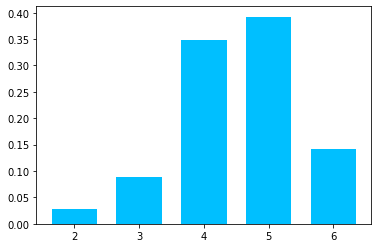

In [26]:
a=plt.hist(x=new_sleep.qua,bins=5,range=(1,6),density=True,histtype="barstacked",align="right",rwidth=0.7,color="deepskyblue")

In [27]:
sleep.Q2_ampmA.value_counts()
sleep.Q2_HoursA.value_counts()

 2    822
 1    200
-1      7
Name: Q2_ampmA, dtype: int64

 10    315
 11    304
 9     160
 12     92
 1      44
 8      35
 2      29
 3      19
 7      11
 6       6
 4       6
-1       6
 5       2
Name: Q2_HoursA, dtype: int64

In [28]:
sleep[math.floor(list(sleep.Q10_a))].groupby(sleep.sleeptime_cat).hist(figsize=(40,40))

TypeError: must be real number, not list

In [29]:
sleep['qua'] = [math.floor(x) for x in sleep.Q10_a]
x1 = sleep.loc[sleep.Q2_ampmA==1, 'qua']
x2 = sleep.loc[sleep.Q2_ampmA==2, 'qua']


kwargs = dict(alpha=0.5, bins=5, density=True, stacked=False)
figure(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.hist(x1, **kwargs, color='r', label='After Midnight')
plt.hist(x2, **kwargs, color='b', label='Before Midnight')
#plt.hist(x3, **kwargs, color='r', label='Good')
plt.gca().set(title='Frequency Histogram of Sleep Quality', ylabel='Probability')
plt.xlim(0,6)
  
plt.legend()
#from matplotlib.pyplot import figure


NameError: name 'figure' is not defined

In [30]:
a=sleep.DOV_TOTALSLEEP[1:20]
b=sleep.Q10_a[1:20]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Q10_a   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              4829.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                   9.59e-259
Time:                        21:31:50   Log-Likelihood:                         -760.04
No. Observations:                 500   AIC:                                      1522.
Df Residuals:                     499   BIC:                                      1526.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
DOV_TOTALSLEEP     0.0078      0.000     69.488      0.000       0.008       0.008
==============================================================================
Omnibus:                       34.185   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.700
Skew:                          -0.534   Prob(JB):                     4.39e-11
Kurtosis:                       4.071   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 288x216 with 0 Axes>

Text(0.5, 0, 'x')

Text(0, 0.5, 'y')

(74.25, 750.75, 0.5809067508713839, 5.8736127032551035)

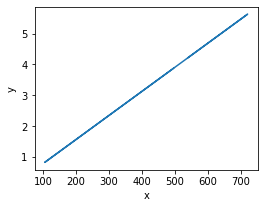

In [71]:
import statsmodels.api as sm

a=sleep.DOV_TOTALSLEEP[0:500]
b=sleep.Q10_a[0:500]
X = a
y = b
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

x_new = a
# Print out the statistics
model.summary()
plt.figure(figsize=(4, 3))
ax = plt.axes()
#ax.scatter(X, y)
ax.plot(x_new,predictions)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('tight')
plt.show()

In [33]:
from __future__ import print_function
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [35]:
formula = 'Q10_a~DOV_TOTALSLEEP'

In [69]:
mod1 = sm.OLS(b,a).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Q10_a   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              2065.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                   4.88e-107
Time:                        21:31:13   Log-Likelihood:                         -297.79
No. Observations:                 200   AIC:                                      597.6
Df Residuals:                     199   BIC:                                      600.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
DOV_TOTALSLEEP     0.0078      0.000     45.447      0.000       0.008       0.008
==============================================================================
Omnibus:                        8.045   Durbin-Watson:                   2.175
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                8.133
Skew:                          -0.493   Prob(JB):                       0.0171
Kurtosis:                       3.066   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

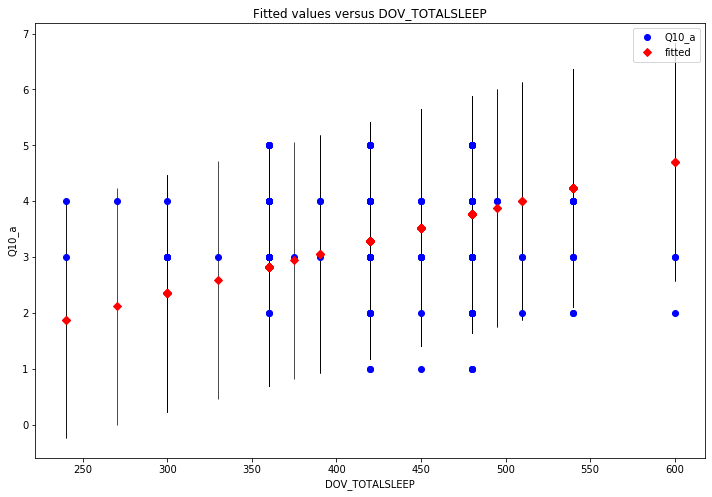

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(mod1, "DOV_TOTALSLEEP", ax=ax)

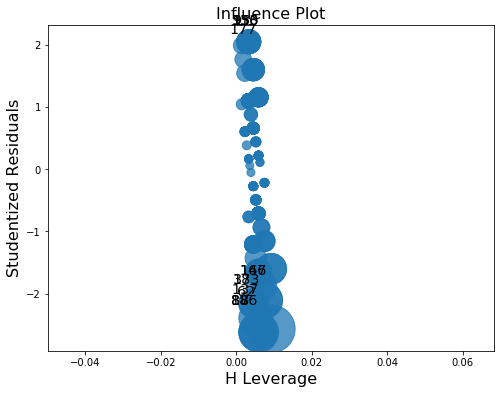

In [78]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sm.graphics.influence_plot(mod1, ax=ax)

In [87]:
new=pd.DataFrame(data=(a,b))
#new.plot(figsize=(12,3))

In [89]:
new=new.T

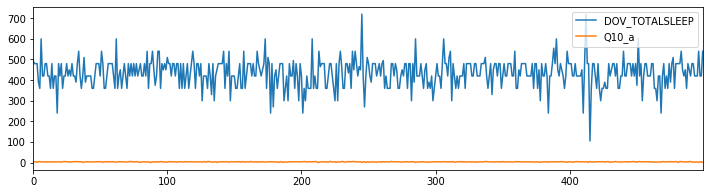

In [90]:
new.plot(figsize=(12,3))

In [101]:
sleep['Q10_a'].isna().values.any()

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c28c8db38>,
      dtype=object)

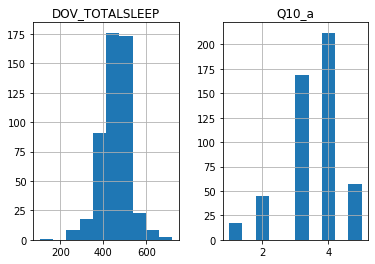

In [103]:
new.hist()

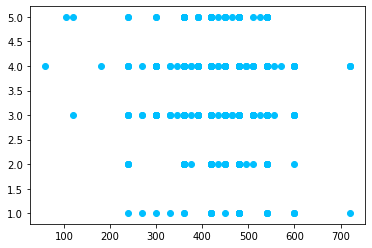

In [109]:
plt.scatter(sleep.DOV_TOTALSLEEP,sleep.Q10_a,color="deepskyblue")

In [110]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [141]:
X=new[['DOV_TOTALSLEEP']]
Y=new[['Q10_a']]


mod2 =sm.OLS(Y,X).fit()
print(mod2.summary())
print('Parameters: ', mod2.params)
print('R2: ', mod2.rsquared)

                                 OLS Regression Results                                
Dep. Variable:                  Q10_a   R-squared (uncentered):                   0.906
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              4829.
Date:                Mon, 02 Dec 2019   Prob (F-statistic):                   9.59e-259
Time:                        22:08:00   Log-Likelihood:                         -760.04
No. Observations:                 500   AIC:                                      1522.
Df Residuals:                     499   BIC:                                      1526.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

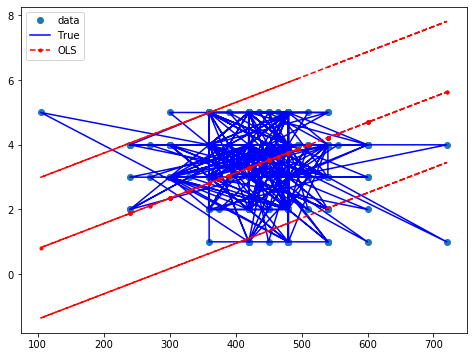

In [146]:
prstd, iv_l, iv_u = wls_prediction_std(mod2)

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(X, Y, 'o', label="data")
ax.plot(X, y, 'b-', label="True")
ax.plot(X, mod2.fittedvalues, 'r--.', label="OLS")
ax.plot(X, iv_u, 'r--')
ax.plot(X, iv_l, 'r--')
ax.legend(loc='best');

In [151]:
sleep[['Q22']]
sleep.qua_cat=sleep.qua.astype("category")

,Q22
0,2
1,2
2,2
3,2
4,2
...,...
1024,2
1025,2
1026,2
1027,2


/Users/MichaelMiao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [1]:
sleep.qua_cat.dtypes

NameError: name 'sleep' is not defined